<a href="https://colab.research.google.com/github/shikharmay7/minor-project/blob/master/minorSem7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
!unzip drive/MyDrive/Datasets/image_accroding_to_model.zip

Streaming output truncated to the last 5000 lines.
 extracting: image_accroding_to_model/00148/sample_92/image_42.png  
 extracting: image_accroding_to_model/00148/sample_92/image_9.png  
   creating: image_accroding_to_model/00148/sample_25/
 extracting: image_accroding_to_model/00148/sample_25/image_12.png  
 extracting: image_accroding_to_model/00148/sample_25/image_37.png  
 extracting: image_accroding_to_model/00148/sample_25/image_18.png  
 extracting: image_accroding_to_model/00148/sample_25/image_49.png  
 extracting: image_accroding_to_model/00148/sample_25/image_32.png  
 extracting: image_accroding_to_model/00148/sample_25/image_13.png  
 extracting: image_accroding_to_model/00148/sample_25/image_43.png  
 extracting: image_accroding_to_model/00148/sample_25/image_44.png  
 extracting: image_accroding_to_model/00148/sample_25/image_3.png  
 extracting: image_accroding_to_model/00148/sample_25/image_39.png  
 extracting: image_accroding_to_model/00148/sample_25/image_35.png  

In [4]:
base_path = "/content/image_accroding_to_model"

In [5]:
dir_list = os.listdir(base_path)
len(dir_list)

34

In [6]:
def getListOfFiles(dirName):
# create a list of file and sub directories 
# names in the given directory  
    listOfFile = os.listdir(dirName)
    allFiles = list()
# Iterate over all the entries
    for entry in listOfFile:
# Create full path
        fullPath = os.path.join(dirName, entry)
# If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
    return allFiles

In [13]:
listOfFiles = list()
for (dirpath, dirnames, filenames) in os.walk(base_path):
  listOfFiles += [os.path.join(dirpath, file) for file in filenames]

In [15]:
listOfFiles.sort()

In [16]:
listOfFiles

['/content/image_accroding_to_model/00001/sample_1/image_0.png',
 '/content/image_accroding_to_model/00001/sample_1/image_1.png',
 '/content/image_accroding_to_model/00001/sample_1/image_10.png',
 '/content/image_accroding_to_model/00001/sample_1/image_11.png',
 '/content/image_accroding_to_model/00001/sample_1/image_12.png',
 '/content/image_accroding_to_model/00001/sample_1/image_13.png',
 '/content/image_accroding_to_model/00001/sample_1/image_14.png',
 '/content/image_accroding_to_model/00001/sample_1/image_15.png',
 '/content/image_accroding_to_model/00001/sample_1/image_16.png',
 '/content/image_accroding_to_model/00001/sample_1/image_17.png',
 '/content/image_accroding_to_model/00001/sample_1/image_18.png',
 '/content/image_accroding_to_model/00001/sample_1/image_19.png',
 '/content/image_accroding_to_model/00001/sample_1/image_2.png',
 '/content/image_accroding_to_model/00001/sample_1/image_20.png',
 '/content/image_accroding_to_model/00001/sample_1/image_21.png',
 '/content/im

In [2]:
# Importing Keras libraries
from keras.utils import np_utils
from keras.models import Sequential
from keras.applications import VGG16, ResNet50
from keras.applications import imagenet_utils
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.layers import Dense, Conv2D, MaxPooling2D, Input, BatchNormalization, GRU
from keras.layers import Dropout, Flatten, GlobalAveragePooling2D, Conv1D, Activation, TimeDistributed
from keras import Model
from keras.optimizers import Adam

In [18]:
def show_imgs(X):
    plt.figure(figsize=(8, 8))
    k = 100
    for i in range(0,4):
        for j in range(0,4):
            image = load_img(X[k], target_size=(224, 224))
            plt.subplot2grid((4,4),(i,j))
            plt.imshow(image)
            k = k+1
    # show the plot
    plt.show()

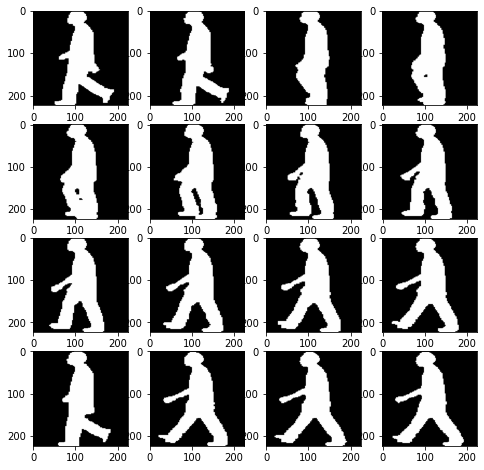

In [19]:
show_imgs(listOfFiles)

(88, 128)

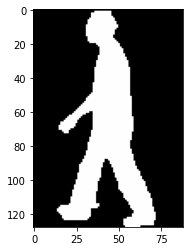

In [20]:
img = load_img(listOfFiles[0])
plt.imshow(img)
img.size

In [1]:
import numpy as np
Tx = 50 #the number of time steps input to the model
n_freq = 25088  #number of features input to the model
m = 1000  #the number of training examples
X = np.zeros((m, Tx, n_freq))

In [2]:
X.shape

(1000, 50, 25088)

In [3]:
model1 = VGG16(weights='imagenet', include_top = False)
model1.summary()

58892288/58889256 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
______________________________________________________________

In [4]:
def create_features(dataset, pre_model):
 
    x_scratch = []
 
    # loop over the images
    for imagePath in dataset:
 
        # load the input image and image is resized to 224x224 pixels 
        image = load_img(imagePath, target_size=(224, 224))
        image = img_to_array(image)
 
        # preprocess the image by (1) expanding the dimensions and
        # (2) subtracting the mean RGB pixel intensity from the
        # ImageNet dataset
        image = np.expand_dims(image, axis=0)
        image = imagenet_utils.preprocess_input(image)
 
        # add the image to the batch
        x_scratch.append(image)
 
    x = np.vstack(x_scratch)
    features = pre_model.predict(x, batch_size=32)
    features_flatten = features.reshape((features.shape[0], 7 * 7 * 512))
    return x, features, features_flatten

In [ ]:
img = load_img(listOfFiles[0], target_size=(224,224))
img = img_to_array(img)
img = np.expand_dims(img, axis=0)
img = imagenet_utils.preprocess_input(img)
features = model1.predict(img)
features_flatten = features.reshape((1,7*7*512))
features_flatten.shape

In [ ]:
features_flatten

In [ ]:
for i in range(20):
  for j in range(25):
    k = i*25 + j
    img = load_img(listOfFiles[k], target_size=(224,224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = imagenet_utils.preprocess_input(img)
    features = model1.predict(img)
    features_flatten = features.reshape((1,7*7*512))
    X[i][j] = features_flatten

In [ ]:
X.shape
# np.save('/content/drive/My Drive/minorX.npy',X)

In [ ]:
label_dict = {0 : 'Aman', 1: 'Ankit', 2: 'Avinash', 3: 'Shikhar'}

In [ ]:
Y=[]
for i in range(4):
  for j in range(5):
    Y.append(i)

In [ ]:
nb_class = 4
y_hot = np_utils.to_categorical(Y, nb_class)
y_hot[:20]

In [ ]:
# np.save('/content/drive/My Drive/minorY.npy', y_hot)

In [ ]:
pip install keras-segmentation

In [ ]:
pip install git+https://github.com/divamgupta/image-segmentation-keras.git

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow.compat.v1.keras.backend import set_session
from tensorflow.core.protobuf import rewriter_config_pb2
# from tensorflow.keras.backend import set_session
tf.keras.backend.clear_session()  # For easy reset of notebook state.

config_proto = tf.ConfigProto()
off = rewriter_config_pb2.RewriterConfig.OFF
config_proto.graph_options.rewrite_options.arithmetic_optimization = off
session = tf.Session(config=config_proto)
set_session(session)

In [ ]:
def model(input_shape):
    """
    Function creating the model's graph in Keras.
    
    Argument:
    input_shape -- shape of the model's input data (using Keras conventions)

    Returns:
    model -- Keras model instance
    """
    
    X_input = Input(shape = input_shape)
    
    # Step 1: CONV layer (≈4 lines)
    X = Conv1D(filters=196,kernel_size=15,strides=4)(X_input)                                 # CONV1D
    X = BatchNormalization()(X)                                  # Batch normalization
    X = Activation("relu")(X)                                 # ReLu activation
    X = Dropout(rate=0.8)(X)                                 # dropout (used 0.8)

    # Step 2: First GRU Layer (≈4 lines)
    X = GRU(units=128, return_sequences =True)(X)    # GRU (used 128 units and return the sequences)
    X = Dropout(rate=0.8)(X)                                   # dropout (used 0.8)
    X = BatchNormalization()(X)                                 # Batch normalization
    
    # Step 3: Second GRU Layer (≈4 lines)
    X = GRU(units=128)(X)                                 # GRU (use 128 units and return the sequences)
    X = Dropout(rate=0.8)(X)                                 # dropout (used 0.8)
    X = BatchNormalization()(X)                                  # Batch normalization
    X = Dropout(rate=0.8)(X)                                 # dropout (used 0.8)
    # X=Flatten()(X)


    # Step 4: Time-distributed dense layer 
    X = Dense(4, activation = "softmax")(X) # time distributed  (sigmoid)
    
    ### END CODE HERE ###

    model = Model(inputs = X_input, outputs = X)
    
    return model

In [ ]:
model = model(input_shape = (Tx, n_freq))

In [ ]:
model.summary()

In [ ]:
opt = Adam(lr=0.0001, beta_1 = 0.9, beta_2 = 0.999, decay=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])

In [ ]:
model.fit(X,y_hot, batch_size=4, epochs=5)